<h3> Overview </h3>
Tune hyperparameters of KNN model. <br>
Then evaluate the models. 

Working with following datasets: 

white_wine_trans_5Q <br>
white_wine_trans_3Q <br>


The evaluation metrics scores were very low, so the model was not trained / evaluated for the red wine data. 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix, f1_score, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier

import warnings

In [2]:
warnings.filterwarnings('ignore')

<h1> Import Transformed Data </h1>

<h2> 5 Quality Labels </h2>

<h3> White Wine </h3>

In [3]:
white_wine_trans_5Q = pd.read_csv('../transformed_wine_data/white_wine_trans_5Q.csv')

In [4]:
X_white = white_wine_trans_5Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_5Q['quality_label']

In [5]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [6]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [7]:
# Grid search to tune hyperparameters

knn = KNeighborsClassifier()

k_values = list(range(2,49))
param_grid = {'n_neighbors': k_values}

#grid_model = RandomizedSearchCV(knn, param_distributions = param_grid, n_iter = 10)
grid_model = GridSearchCV(knn,param_grid)

In [8]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [9]:
grid_model.best_params_

{'n_neighbors': 20}

Best params: <br>
n_neighbors = 20

In [10]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        54
         low       0.00      0.00      0.00        55
lower_middle       0.55      0.59      0.57       437
      middle       0.55      0.66      0.60       660
upper_middle       0.50      0.39      0.44       264

    accuracy                           0.54      1470
   macro avg       0.32      0.33      0.32      1470
weighted avg       0.50      0.54      0.52      1470



accuracy: 54% <br>
f1 macro avg: 32%

Text(0.5, 1.0, 'KNN – white wine – 5 labels')

<Figure size 432x288 with 0 Axes>

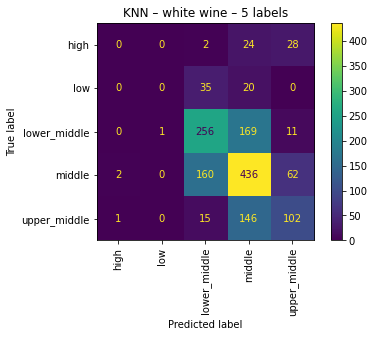

In [11]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('KNN – white wine – 5 labels')


<h2> 3 Quality Labels </h2>

<h3> White Wine </h3>

In [12]:
white_wine_trans_3Q = pd.read_csv('../transformed_wine_data/white_wine_trans_3Q.csv')

In [13]:
X_white = white_wine_trans_3Q.drop(['quality_label', 'quality', 'type'], axis = 1)
y_white = white_wine_trans_3Q['quality_label']

In [14]:
# Train | Test split
X_train, X_test, y_train, y_test = train_test_split(X_white, y_white, test_size=0.3, random_state=101, stratify = y_white)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
knn = KNeighborsClassifier()

k_values = list(range(2,49))
param_grid = {'n_neighbors': k_values}

#grid_model = RandomizedSearchCV(knn, param_distributions = param_grid, n_iter = 10)
grid_model = GridSearchCV(knn,param_grid)

In [17]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [18]:
grid_model.best_params_

{'n_neighbors': 41}

Best params: <br>
n_neighbors = 41

In [19]:
y_pred = grid_model.predict(scaled_X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.54      0.47      0.50       318
         low       0.69      0.63      0.66       492
      medium       0.56      0.64      0.60       660

    accuracy                           0.60      1470
   macro avg       0.60      0.58      0.59      1470
weighted avg       0.60      0.60      0.60      1470



accuracy: 60% <br>
f1 macro avg: 59%

Text(0.5, 1.0, 'KNN – white wine – 3 labels')

<Figure size 432x288 with 0 Axes>

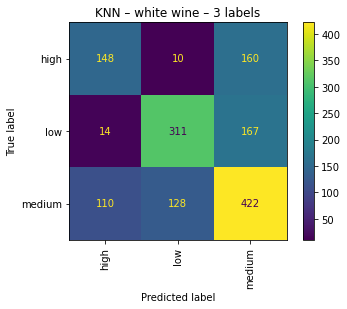

In [20]:
plt.figure()
plot_confusion_matrix(grid_model, scaled_X_test, y_test)
plt.xticks(rotation = 90)
plt.title('KNN – white wine – 3 labels')
